In [90]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
base = pd.read_csv("iris.csv")
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
base.shape

(150, 5)

In [33]:
#estabelecendo semenete aleatoria para assim obter sempre os mesmos resultados durante essa amostragem
np.random.seed(2345)
#iremos retirar 150 amostras de 0 e 1
amostra = np.random.choice(a = [0,1], size = 150, replace = True, p =[0.7, 0.3])
#Nos certificando sobre o tamanho da amostra
#len(amostra)
#verificando quantos numeros da amostra são 0's
#len(amostra [amostra == 0])
#verificando quantos numeros da amostra são 1's
#len(amostra [amostra ==1])
#exibindo a amostra
amostra

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [36]:
#selecionando uma amostra na nossa base de forma aleatoria utilizando a amostra que 
#retiramos anteriormente, para essa amostra selecionaremos todos as informações em que sua posição coincida 
#com a posição de um número 0 em nossa amostra
amostras_da_base = base.loc[amostra == 0]
amostras_da_base.shape


(101, 5)

In [38]:
#fazendo o mesmo procedimento porém utilizando o 1 ao invés do 0
amostras_da_base2= base.loc[amostra==1]
amostras_da_base2.shape

(49, 5)

In [39]:
##################################################
##Amostragem sistematica
##################################################

In [41]:
# criação de variaveis para representar a população, a amostra e o valor de K
população = 150
amostra = 15
k = ceil(população / amostra)
print(k)

10


In [43]:
# definindo o valor randomico de qual a amostra irá começar, esse valor pode ir de 1 até k+1
r = np.random.randint(low = 1, high = k+1, size = 1)
print(r)

[2]


In [45]:
# Criando um for para selecionar os números para assim retirar a amostra
acumulador = r[0]
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador+=k
print(sorteados)    

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]


In [46]:
#retirando a amostra

amostras_da_base = base.loc[sorteados]
amostras_da_base

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [47]:
##################################################
##Amostragem estratificada
##################################################

In [51]:
# relendo a base iris pois mais tarde usaremos outra base
iris = pd.read_csv("iris.csv")
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [55]:
#utilizando o train test split para extrair uma amostra estratificada com 25 amostras sem reposição de cada classe da base iris
x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],  test_size = 0.5, stratify= iris.iloc[:, 4])
y.value_counts()

Iris-versicolor    25
Iris-virginica     25
Iris-setosa        25
Name: class, dtype: int64

In [57]:
# upload da segunda base de dados e exploração simples dela
infert = pd.read_csv("infert.csv")
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [58]:
#explorando a coluna education, coluna que será a base para a nossa amostra estratificada
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [69]:
#retirando a amostra estratificada
x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                               test_size = 0.6, stratify = infert.iloc[:, 1])
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [70]:
##################################################
##Medidas de centralidade e variabilidade
##################################################

In [73]:
#criando uma variavel com o salario de varios jogadores para produzirmos nossa analise em cima dessa base
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
np.mean(jogadores)

181111.11111111112

In [74]:
np.median(jogadores)

40000.0

In [75]:
#criação de variavel para criar e armazenar os quartis desses dados
quartis = np.quantile(jogadores, [0, 0.25, 0.50, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [77]:
#visualização do desvio padrão
np.std(jogadores, ddof=1)

255307.87514511007

In [78]:
# utilizando a função describe para obter mais informações do conjunto de dados de forma mais simples
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

In [79]:
##################################################
##Distribuição normal
##################################################

In [80]:
#questões e resoluções a seguir

In [82]:
#Há um conjunto de objetos em uma cesta, a média do peso dos objetos é 8 e o desvio padrão é 2
# qual a probabilidade de alguem tirar um objeto cujo o peso seja menor do que 6
stats.norm.cdf(6,8,2)

0.15865525393145707

In [83]:
# qual a probabilidade de tirar um objeto cujo peso seja maior do que 6
stats.norm.sf(6,8,2)

0.8413447460685429

In [84]:
# qual a probabilidade de tirar um objeto cujo peso seja maior do que 6 e menor do que 10
stats.norm.cdf(6,8,2) + stats.norm.sf(10,8,2)

0.31731050786291415

In [89]:
#qual a probabilidade de tirar um objeto cujo peso seja maior que 8 e menor do que 10
stats.norm.cdf(10,8,2) - stats.norm.cdf(8,8,2)

0.3413447460685429

In [91]:
##################################################
##Testes de normalidade
##################################################

In [92]:
# criação de uma variavel normalemnte distribuida por meio de uma função rvs (100 elementos)
dados = stats.norm.rvs(size = 100)
dados

array([ 2.56196651, -0.50549888, -1.18504523, -1.46380279, -0.08138577,
       -1.99768999,  1.42439125, -0.7748759 ,  0.51490512, -0.3253787 ,
       -1.19558116,  0.35871268, -0.9548115 , -1.58011688,  0.35030195,
       -0.21670701,  0.7148522 ,  1.14136449,  0.67073037,  0.22451119,
       -0.72123723,  0.5758312 , -0.39424184,  0.44640114, -1.05811827,
       -0.60343979, -1.36524684, -0.01914562,  0.01866546,  1.04105293,
       -0.24851636,  1.13833469, -0.05297352,  0.01442368,  0.96317506,
       -0.23652499,  0.65688881, -0.69401686, -0.15277855, -0.39182061,
        0.18017934,  0.70385562, -0.21123071, -0.67618014,  1.94370849,
        0.19981271, -0.10637513,  0.26607762, -0.85669249,  1.1594893 ,
       -0.47869244, -0.22548591,  1.74150585,  1.5985284 , -0.67867595,
       -0.2316942 , -1.90314077,  0.73279649,  0.23690294,  0.43642344,
        0.60369656, -0.44449278, -2.02922161, -0.1979728 , -0.81940165,
       -2.62238591,  1.34297939,  0.04981415,  0.26103746, -0.63

Text(0.5, 1.0, 'dados')

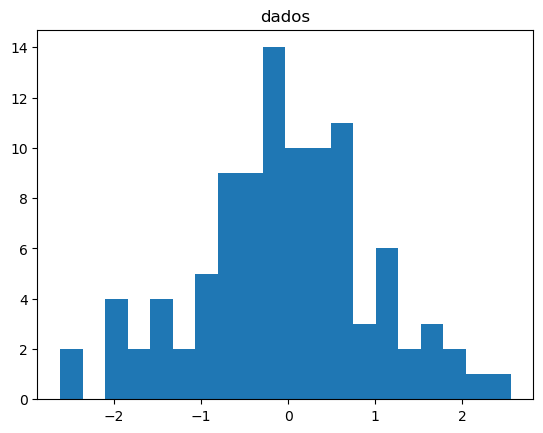

In [94]:
#analisando a base criada por meio de um histograma
plt.hist(dados, bins = 20)
plt.title('dados')

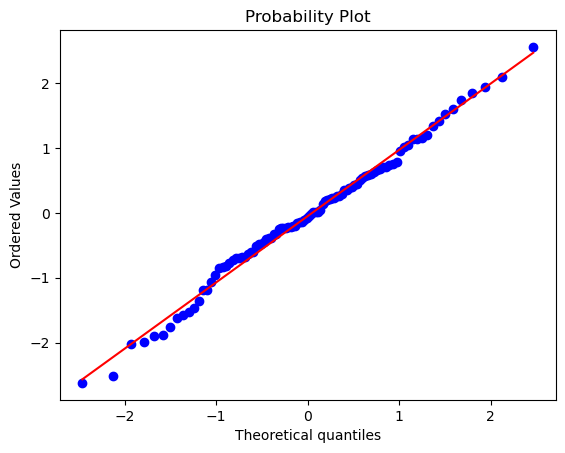

In [96]:
# geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados, fit = True, plot=ax)
plt.show()

In [97]:
#execução de testes de shapiro para confirmar a distribuição normal, (se p for acima de 0,05, o gráfico está proximo de uma distribuição normal)

stats.shapiro(dados)

ShapiroResult(statistic=0.992056131362915, pvalue=0.8252794146537781)

In [99]:
#criando dados não normais
dados2 = stats.skewnorm.rvs(4, size = 1000)

Text(0.5, 1.0, 'dados')

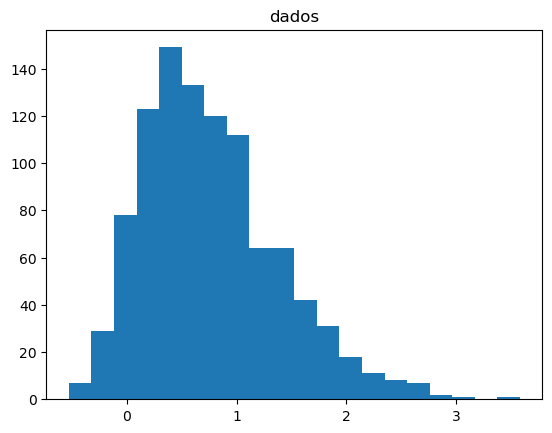

In [100]:
#gerando um histograma desses dados
plt.hist(dados2, bins = 20)
plt.title('dados')

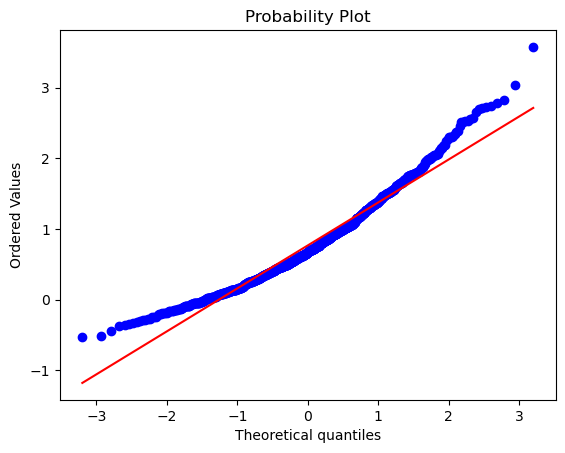

In [101]:
#geração de kickplot para verificar a distribuição
fig, ax = plt.subplots()
stats.probplot(dados2, fit = True, plot=ax)
plt.show()

In [102]:
#realizando o teste de shapiro para confirmar que a base não é normalmente distribuida
stats.shapiro(dados2)

ShapiroResult(statistic=0.962196946144104, pvalue=2.0176002931077477e-15)